In [46]:
import os
import nltk
import matplotlib.pyplot as plt
import re

In [47]:
def get_txt_and_tsv_files(directory):
    txt_files = []
    tsv_files = []

    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.txt'):
                txt_files.append(os.path.join(root, file))
            elif file.endswith('.tsv'):
                tsv_files.append(os.path.join(root, file))

    return txt_files, tsv_files

directory_path = "/kaggle/input/dakshina-dataset/dakshina_dataset_v1.0/hi/native_script_wikipedia"
txt_list, tsv_list = get_txt_and_tsv_files(directory_path)

print("TXT Files:")
print(txt_list)
print("\nTSV Files:")
print(tsv_list)


TXT Files:
['/kaggle/input/dakshina-dataset/dakshina_dataset_v1.0/hi/native_script_wikipedia/hi.wiki-filt.valid.text.shuf.txt/wiki-filt.valid.text.shuf.txt', '/kaggle/input/dakshina-dataset/dakshina_dataset_v1.0/hi/native_script_wikipedia/hi.wiki-full.nonblock.sections.list.txt/wiki-full.nonblock.sections.list.txt', '/kaggle/input/dakshina-dataset/dakshina_dataset_v1.0/hi/native_script_wikipedia/hi.wiki-full.omit_pages.txt/wiki-full.omit_pages.txt', '/kaggle/input/dakshina-dataset/dakshina_dataset_v1.0/hi/native_script_wikipedia/hi.wiki-filt.train.text.shuf.txt/wiki-filt.train.text.shuf.txt']

TSV Files:
['/kaggle/input/dakshina-dataset/dakshina_dataset_v1.0/hi/native_script_wikipedia/hi.wiki-full.nonblock.sections.tsv/wiki-full.nonblock.sections.tsv', '/kaggle/input/dakshina-dataset/dakshina_dataset_v1.0/hi/native_script_wikipedia/hi.wiki-full.text.sorted.tsv/wiki-full.text.sorted.tsv', '/kaggle/input/dakshina-dataset/dakshina_dataset_v1.0/hi/native_script_wikipedia/hi.wiki-filt.valid

In [48]:
def read_all_txt_files(txt_files):
    all_text = ""
    for file_path in txt_files:
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                all_text += f.read() + "\n"
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
    return all_text
corpora = read_all_txt_files(txt_list)


In [49]:
import unicodedata

def clean_unicode_text(text):
    cleaned = ''.join(
        ch for ch in text
        if unicodedata.category(ch).startswith('L') or ch.isspace()
    )
    return ' '.join(cleaned.split())  # Normalize whitespace
cleaned = clean_unicode_text(corpora)

In [50]:
print(len(cleaned))
print(cleaned[:2])

66890171
हक


In [51]:
cp_list = cleaned.split()
total_hindi_words = len(cp_list)
print(total_hindi_words)

18514812


In [52]:
cp_list[:5]

['हकटयर', 'म', 'स', 'कवल', 'परतशत']

In [53]:
unique_words = set(cp_list)
unique_hindi_words = len(unique_words)
print(unique_hindi_words)

294566


In [54]:
ttr = (unique_hindi_words / total_hindi_words)*100
ttr

1.5909748367955345

In [63]:
def hindi_syllable_split(word):
    syllables = []
    current = ""

    for char in word:
        # Check if char is an independent vowel or consonant in Devanagari
        if '\u0904' <= char <= '\u0914' or '\u0915' <= char <= '\u0939':
            # If current syllable is not empty, save it before starting new
            if current:
                syllables.append(current)
            current = char
        # If char is vowel sign (matra), halant, or nasalization sign, append to current syllable
        elif char in ['\u093A', '\u093B', '\u093E', '\u093F', '\u0940', '\u0941', '\u0942', '\u0943', '\u0944',
                      '\u0945', '\u0946', '\u0947', '\u0948', '\u0949', '\u094A', '\u094B', '\u094C', '\u094D',
                      '\u0900', '\u0901', '\u0902', '\u0903']:
            current += char
        else:
            # For any other character (punctuation, space, etc.) close the current syllable if exists
            if current:
                syllables.append(current)
                current = ""
    if current:
        syllables.append(current)

    return syllables


In [64]:
all_syllables = []
for word in cp_list:
    all_syllables.extend(hindi_syllable_split(word))


In [65]:
all_syllables[:10]

['ह', 'क', 'ट', 'य', 'र', 'म', 'स', 'क', 'व', 'ल']

In [58]:
total_syllables = len(all_syllables)
unique_syllables = len(set(all_syllables))
syllable_ttr = (unique_syllables / total_syllables)*100
syllable_ttr

100.0

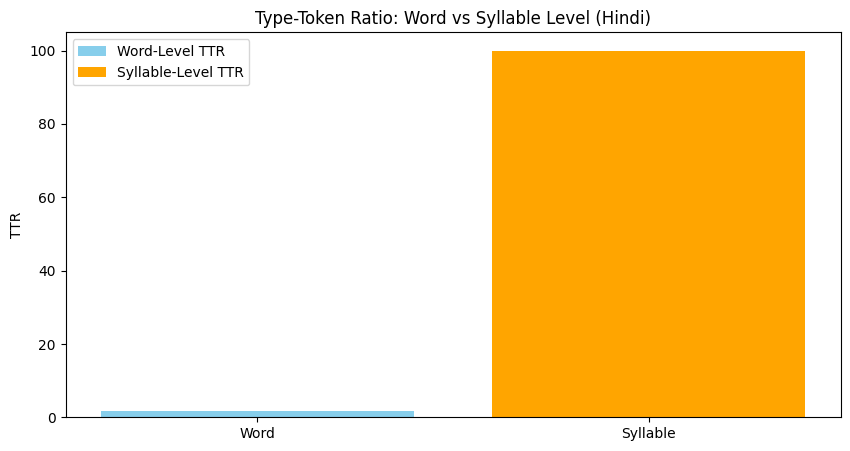

In [59]:
# Word-level TTR
plt.figure(figsize=(10, 5))
plt.bar(['Word'], [ttr], color='skyblue', label='Word-Level TTR')

# Syllable-level TTR
plt.bar(['Syllable'], [syllable_ttr], color='orange', label='Syllable-Level TTR')
plt.title("Type-Token Ratio: Word vs Syllable Level (Hindi)")
plt.ylabel("TTR")
plt.legend()
plt.show()


# Take any 10 sentences of English having length of 25 to 30 words and carry out POS tagging manually and then compare with NLTK output. 

In [60]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))


sentences = [
    "The brave knight fought a fearsome dragon to rescue the captured princess from her tower.",
    "A small, determined team of researchers is working on a cure for the rare disease.",
    "The old abandoned lighthouse stood tall on the cliff, its beacon no longer guiding ships safely to shore.",
    "Despite the pouring rain, the enthusiastic crowd cheered loudly for their favorite team throughout the entire game.",
    "The chef carefully prepared a gourmet meal using fresh, locally sourced ingredients from the nearby organic farm.",
    "An intricate tapestry, woven by hand centuries ago, hung on the castle wall, telling a story of ancient battles and victories.",
    "He carefully chose his words, knowing that the outcome of the entire negotiation depended on his precise phrasing.",
    "The talented artist spent months painting a large mural that depicted the rich history of the entire community.",
    "Because of the severe drought, the farmers were worried about the survival of their crops in the arid landscape.",
    "The energetic puppy chased the colorful butterflies through the sunlit meadow, its tail wagging with pure joy."
]

# Manual Tagging
1. The brave knight fought a fearsome dragon to rescue the captured princess from her tower.

   DET/ADJ/NOUN/VERB/DET/ADJ/NOUN/PART/VERB/DET/ADJ/NOUN/ADP/PRON/NOUN/PUNCT

2. A small, determined team of researchers is working on a cure for the rare disease.

   DET/ADJ/PUNCT/ADJ/NOUN/ADP/NOUN/VERB/VERB/ADP/DET/NOUN/ADP/DET/ADJ/NOUN/PUNCT

3. The old abandoned lighthouse stood tall on the cliff, its beacon no longer guiding ships safely to shore.

   DET/ADJ/ADJ/NOUN/VERB/ADJ/ADP/DET/NOUN/PUNCT/PRON/NOUN/ADV/ADV/VERB/NOUN/ADV/ADP/NOUN/PUNCT

4. Despite the pouring rain, the enthusiastic crowd cheered loudly for their favorite team throughout the entire game.

   SCONJ/DET/VERB/NOUN/PUNCT/DET/ADJ/NOUN/VERB/ADV/ADP/PRON/ADJ/NOUN/ADP/DET/ADJ/NOUN/PUNCT

5. The chef carefully prepared a gourmet meal using fresh, locally sourced ingredients from the nearby organic farm.

    DET/NOUN/ADV/VERB/DET/ADJ/NOUN/VERB/ADJ/PUNCT/ADV/VERB/NOUN/ADP/DET/ADJ/ADJ/NOUN/PUNCT

6. An intricate tapestry, woven by hand centuries ago, hung on the castle wall, telling a story of ancient battles and victories.

    DET/ADJ/NOUN/PUNCT/VERB/ADP/NOUN/NOUN/ADV/PUNCT/VERB/ADP/DET/NOUN/NOUN/PUNCT/VERB/DET/NOUN/ADP/ADJ/NOUN/CCONJ/NOUN/PUNCT

7. He carefully chose his words, knowing that the outcome of the entire negotiation depended on his precise phrasing.

    PRON/ADV/VERB/PRON/NOUN/PUNCT/VERB/SCONJ/DET/NOUN/ADP/DET/ADJ/NOUN/VERB/ADP/PRON/ADJ/NOUN/PUNCT

8. The talented artist spent months painting a large mural that depicted the rich history of the entire community.

    DET/ADJ/NOUN/VERB/NOUN/VERB/DET/ADJ/NOUN/SCONJ/VERB/DET/ADJ/NOUN/ADP/DET/ADJ/NOUN/PUNCT

9. Because of the severe drought, the farmers were worried about the survival of their crops in the arid landscape.

    SCONJ/ADP/DET/ADJ/NOUN/PUNCT/DET/NOUN/VERB/ADJ/ADP/DET/NOUN/ADP/PRON/NOUN/ADP/DET/ADJ/NOUN/PUNCT

10. The energetic puppy chased the colorful butterflies through the sunlit meadow, its tail wagging with pure joy.

    DET/ADJ/NOUN/VERB/DET/ADJ/NOUN/ADP/DET/ADJ/NOUN/PUNCT/PRON/NOUN/VERB/ADP/ADJ/NOUN/PUNCT

In [61]:
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [62]:
for sentence in sentences:
    tokens = nltk.word_tokenize(sentence)
    pos_tags = nltk.pos_tag(tokens)
    print(f"\nSentence: {sentence}")
    print("POS Tags:", pos_tags)



Sentence: The brave knight fought a fearsome dragon to rescue the captured princess from her tower.
POS Tags: [('The', 'DT'), ('brave', 'NN'), ('knight', 'VBD'), ('fought', 'RB'), ('a', 'DT'), ('fearsome', 'JJ'), ('dragon', 'NN'), ('to', 'TO'), ('rescue', 'VB'), ('the', 'DT'), ('captured', 'JJ'), ('princess', 'NN'), ('from', 'IN'), ('her', 'PRP$'), ('tower', 'NN'), ('.', '.')]

Sentence: A small, determined team of researchers is working on a cure for the rare disease.
POS Tags: [('A', 'DT'), ('small', 'JJ'), (',', ','), ('determined', 'JJ'), ('team', 'NN'), ('of', 'IN'), ('researchers', 'NNS'), ('is', 'VBZ'), ('working', 'VBG'), ('on', 'IN'), ('a', 'DT'), ('cure', 'NN'), ('for', 'IN'), ('the', 'DT'), ('rare', 'JJ'), ('disease', 'NN'), ('.', '.')]

Sentence: The old abandoned lighthouse stood tall on the cliff, its beacon no longer guiding ships safely to shore.
POS Tags: [('The', 'DT'), ('old', 'JJ'), ('abandoned', 'VBN'), ('lighthouse', 'RB'), ('stood', 'VBD'), ('tall', 'NN'), ('on'